In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_absolute_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib

# # 设置全局字体
matplotlib.rcParams["font.family"] = "SimSun"

raw_data = pd.read_csv(r"data\qiyeshuju-4S间隔.csv", encoding="gbk")

raw_data.index = pd.to_datetime(raw_data["时间"])
raw_data.drop(["时间"], axis=1, inplace=True)
raw_data.drop(["右侧换火信号"], axis=1, inplace=True)
columns = raw_data.columns

# 划分训练集和测试集，假设用前80%的数据作为训练集，后20%的数据作为测试集

one_data = raw_data["2024-01-02 00:00:00":"2024-01-02 23:59:59"]
n = len(one_data)
data = one_data[[r"VA.NOX($mg/m^{3}$)"]]
# 转换列名
data.columns = ["y"]
# test_data.loc[:, "ds"] = test_data.index


In [16]:
import pandas as pd
from pmdarima.arima import auto_arima

# 读取时间序列数据
# data = pd.read_csv('your_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 提取 y 列作为 pd.Series 对象
y = data['y']

# 自动选择 ARIMA 模型阶数
model = auto_arima(y, seasonal=False, trace=True, suppress_warnings=True)

# 输出最佳模型的阶数
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=189667.208, Time=3.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=198157.094, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=192936.174, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=194962.505, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=198155.095, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=190270.584, Time=1.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=190326.955, Time=2.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=189660.982, Time=4.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=190246.936, Time=3.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=189661.159, Time=7.69 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=189669.377, Time=5.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=189660.810, Time=5.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=190034.495, Time=3.02 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=189662.020, Time=7.32 sec
 ARIM

c:\Users\glx\anaconda3\envs\ft\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4S will be used.
  self._init_dates(dates, freq)
c:\Users\glx\anaconda3\envs\ft\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4S will be used.
  self._init_dates(dates, freq)
c:\Users\glx\anaconda3\envs\ft\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4S will be used.
  self._init_dates(dates, freq)
c:\Users\glx\anaconda3\envs\ft\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\glx\anaconda3\envs\ft\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: No

ValueError: x and y must have same first dimension, but have shapes (4320,) and (75,)

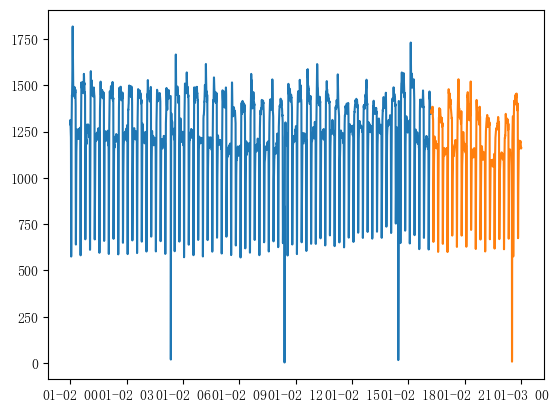

In [28]:


# 将数据分成训练集和测试集
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# 提取训练集和测试集的 y 列
train_y = train_data['y']
forecast = test_data['y']

# 拟合 ARIMA 模型
model = ARIMA(train_y, order=(5, 1, 5))  # 替换 p、d、q 为合适的值
model_fit = model.fit()

# 预测测试集数据
forecast = model_fit.forecast(steps=75)  # 预测与测试集长度相同的步数

# 获取预测值、上下限和真实值


forecast_values = forecast
# forecast_lower = forecast[2][:, 0]
# forecast_upper = forecast[2][:, 1]

# 创建时间索引
future_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='5min')

# 绘制预测结果
plt.plot(train_data.index, train_y, label='Train')
plt.plot(test_data.index, test_y, label='Actual')
plt.plot(future_index, forecast_values, label='Forecast', color='red')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
5*60/4

75.0